In [1]:
samples = map(lambda x: x.strip('\r\n'), open('./samples/call_samples.txt', 'r').readlines())
print samples[:100]

['942920', '275619', '1252872', '133320', '572076', '1291830', '1086685', '242842', '1209948', '733107', '1288488', '130895', '448086', '518198', '1206481', '906376', '653841', '37253', '1335933', '449402', '423315', '633153', '476446', '140647', '825114', '195102', '727357', '946296', '853117', '339516', '263317', '1295295', '274393', '52247', '1318617', '1175648', '30133', '791830', '302736', '162771', '619794', '1330160', '151019', '995844', '442011', '138815', '753845', '645752', '1007383', '94169', '344124', '640239', '1007850', '363088', '60557', '1094064', '371708', '148449', '721087', '1043967', '560091', '1145500', '660187', '1166655', '893942', '718895', '239809', '286929', '59902', '280020', '1320935', '315629', '403570', '910750', '904142', '1030091', '658062', '713103', '1228924', '1124927', '983813', '1205989', '337109', '396633', '250985', '21652', '1146035', '867130', '597', '368116', '1329616', '997853', '576798', '333342', '578152', '620513', '258784', '339170', '1147

In [2]:
eg3sizes = map(lambda i: i.strip('\n').split(': ')[-1], open('./logs/call_100eg3.log').readlines())
print eg3sizes[:100]

['490134', '316', '3461147', '849', '18710', '3966', '3103', '2841964', '137580', '70172', '2483', '3288194', '621892', '5870', '429500', '3040298', '2242', '155352', '137386', '929719', '2552682', '772', '150416', '1644090', '3805476', '13521', '217630', '160222', '1695201', '1957564', '1634258', '152124', '2060608', '66966', '48336', '3622093', '1932889', '2764630', '1542483', '1542587', '3395897', '3449861', '3471422', '462863', '2791764', '2763115', '576738', '21648', '1001', '255262', '195801', '1757363', '219034', '771', '63476', '3402291', '69988', '181754', '5900', '691', '800673', '1008', '2764041', '2763410', '2790071', '146472', '75507', '156430', '2757188', '356985', '149486', '2231', '401', '1597', '462705', '2897582', '84832', '2756056', '1263', '356328', '177785', '199890', '1254', '1016440', '160892', '129039', '646', '2756133', '1023024', '182452', '233259', '4682', '152960', '18471', '3404343', '442815', '1689300', '2758137', '2175', '159477']


In [3]:
import pandas as pd
user_data = pd.read_csv('/home/sysadmin/zhicongchen/DataSets/phone_data/tb_user_info_201202.csv')

In [4]:
user_data.AGE[user_data.ACC_NBR == int(samples[0])].tolist()[0]

22.0

In [20]:
N = 1000
user_data = user_data.fillna(0)
ages =  map(lambda x: user_data.AGE[user_data.ACC_NBR == int(samples[x])].tolist()[0], range(N))
print ages

[22.0, 0.0, 21.0, 40.0, 33.0, 43.0, 22.0, 33.0, 24.0, 33.0, 29.0, 25.0, 36.0, 29.0, 77.0, 39.0, 41.0, 41.0, 31.0, 38.0, 40.0, 45.0, 30.0, 32.0, 39.0, 32.0, 34.0, 47.0, 45.0, 81.0, 50.0, 39.0, 36.0, 46.0, 37.0, 28.0, 39.0, 40.0, 33.0, 71.0, 43.0, 36.0, 80.0, 0.0, 42.0, 0.0, 37.0, 0.0, 38.0, 23.0, 49.0, 0.0, 38.0, 42.0, 58.0, 31.0, 31.0, 0.0, 48.0, 0.0, 47.0, 21.0, 0.0, 0.0, 20.0, 38.0, 38.0, 56.0, 78.0, 42.0, 28.0, 24.0, 70.0, 47.0, 31.0, 50.0, 33.0, 37.0, 28.0, 0.0, 23.0, 45.0, 28.0, 23.0, 47.0, 0.0, 23.0, 38.0, 0.0, 27.0, 47.0, 47.0, 42.0, 0.0, 51.0, 50.0, 50.0, 20.0, 0.0, 37.0, 0.0, 29.0, 48.0, 0.0, 50.0, 62.0, 26.0, 24.0, 37.0, 60.0, 43.0, 44.0, 43.0, 27.0, 46.0, 24.0, 54.0, 22.0, 22.0, 42.0, 26.0, 34.0, 35.0, 25.0, 35.0, 22.0, 44.0, 42.0, 37.0, 25.0, 30.0, 37.0, 28.0, 48.0, 0.0, 33.0, 29.0, 23.0, 0.0, 49.0, 36.0, 25.0, 26.0, 24.0, 48.0, 48.0, 25.0, 34.0, 24.0, 46.0, 27.0, 40.0, 27.0, 61.0, 25.0, 55.0, 42.0, 61.0, 21.0, 23.0, 42.0, 49.0, 31.0, 0.0, 33.0, 56.0, 44.0, 27.0, 0.0, 0.0, 

In [6]:
user_data = user_data.fillna(0)
consume_amt =  map(lambda x: user_data.CONSUME_AMT[user_data.ACC_NBR == int(samples[x])].tolist()[0], range(N))
print consume_amt

[35.950000000000003, 22.34, 76.069999999999993, 5.6399999999999997, 86.739999999999995, 2.27, 106.83, 52.549999999999997, 31.300000000000001, 66.280000000000001, 22.420000000000002, 70.430000000000007, 15.67, 4.8300000000000001, 3.8700000000000001, 75.909999999999997, 29.379999999999999, 29.710000000000001, 0.070000000000000007, 145.75999999999999, 39.350000000000001, 10.140000000000001, 21.670000000000002, 259.91000000000003, 23.98, 31.289999999999999, 26.670000000000002, 32.579999999999998, 29.780000000000001, 140.37, 28.640000000000001, 29.379999999999999, 93.959999999999994, 8.4000000000000004, 18.789999999999999, 214.03, 13.699999999999999, 63.130000000000003, 6.6699999999999999, 59.619999999999997, 102.12, 69.530000000000001, 9.0700000000000003, 4.8499999999999996, 49.729999999999997, 38.899999999999999, 76.629999999999995, 8.9700000000000006, 97.540000000000006, 9.9100000000000001, 65.5, 114.81999999999999, 72.379999999999995, 10.5, 18.48, 56.670000000000002, 1.1599999999999999,

In [7]:
user_data = user_data.fillna(0)
terminal_price =  map(lambda x: user_data.TERMINAL_PRICE[user_data.ACC_NBR == int(samples[x])].tolist()[0], range(N))
print terminal_price

[0.0, 0.0, 0.0, 0.0, 230.0, 498.0, 0.0, 0.0, 185.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1280.0, 310.0, 0.0, 0.0, 658.0, 0.0, 498.0, 0.0, 0.0, 0.0, 298.0, 450.0, 0.0, 0.0, 0.0, 0.0, 0.0, 515.0, 0.0, 0.0, 0.0, 598.0, 0.0, 265.0, 0.0, 298.0, 0.0, 898.0, 0.0, 0.0, 298.0, 1030.0, 298.0, 0.0, 0.0, 3850.0, 278.0, 0.0, 0.0, 0.0, 298.0, 0.0, 0.0, 0.0, 400.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 898.0, 3980.0, 298.0, 265.0, 0.0, 500.0, 0.0, 0.0, 498.0, 0.0, 0.0, 299.0, 300.0, 1688.0, 258.0, 0.0, 0.0, 0.0, 900.0, 0.0, 265.0, 0.0, 0.0, 0.0, 300.0, 0.0, 0.0, 1680.0, 265.0, 300.0, 298.0, 0.0]


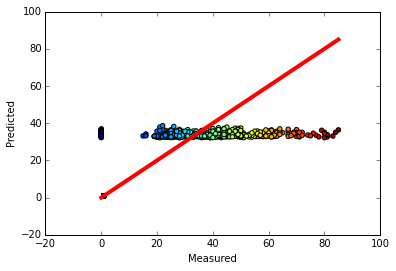

In [23]:
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lr = linear_model.LinearRegression()
X = np.array(map(lambda i: int(i), eg3sizes))
y = np.array(map(lambda i: int(i), ages))

X = np.array(map(lambda x: (int(x),1), X))
y = np.array(map(lambda x: (int(x),1), y))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, c = y)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

(array([ 107.,    3.,  136.,  261.,  207.,  175.,   47.,   37.,   16.,   11.]),
 array([  0. ,   8.5,  17. ,  25.5,  34. ,  42.5,  51. ,  59.5,  68. ,
         76.5,  85. ]),
 <a list of 10 Patch objects>)

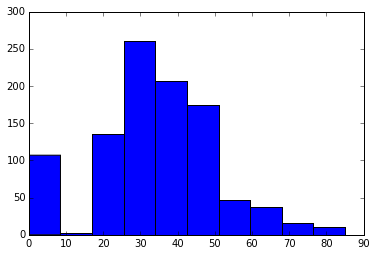

In [24]:
plt.hist(ages)

(array([ 586.,   51.,   23.,   29.,   79.,    8.,    6.,  162.,   44.,   12.]),
 array([  2.00000000e+00,   3.88289200e+05,   7.76576400e+05,
          1.16486360e+06,   1.55315080e+06,   1.94143800e+06,
          2.32972520e+06,   2.71801240e+06,   3.10629960e+06,
          3.49458680e+06,   3.88287400e+06]),
 <a list of 10 Patch objects>)

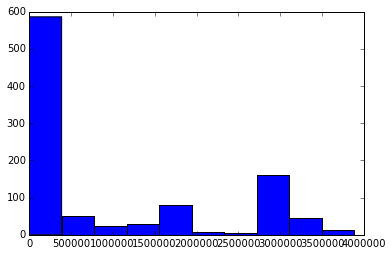

In [26]:
plt.hist(map(lambda i: int(i), eg3sizes))

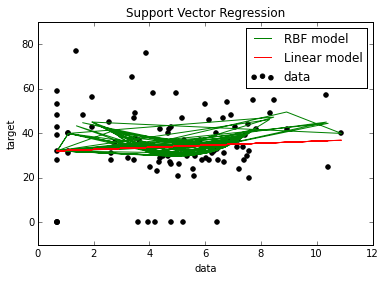

In [26]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

###############################################################################
# Generate sample data
#X = np.array(map(lambda x: [x], eg3sizes))
#y = np.array(ages)

X = np.array(map(lambda i: [np.log(int(i))], eg3sizes))
y = np.array(map(lambda i: int(i), ages))

###############################################################################
# Add noise to targets
# y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
plt.scatter(X, y, c='k', label='data')
plt.hold('on')
plt.plot(X, y_rbf, c='g', label='RBF model')
plt.plot(X, y_lin, c='r', label='Linear model')
#plt.plot(X, y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

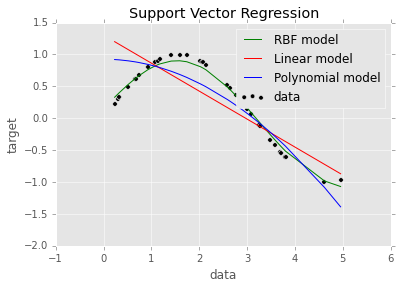

In [14]:
import numpy as np
from sklearn.svm import SVR
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline
style.use('ggplot')

###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
#y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
plt.scatter(X, y, c='k', label='data')
plt.hold('on')
plt.plot(X, y_rbf, c='g', label='RBF model')
plt.plot(X, y_lin, c='r', label='Linear model')
plt.plot(X, y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [14]:
X[0]

array([ 0.03520609])

['1121697', '979767', '888300', '543841', '1207425', '1173342', '1154321', '135827', '515151', '589933', '896466', '1130212', '527714', '936100', '600664', '601747', '18935', '1036858', '806083', '972743', '744570', '309647', '831448', '84340', '408544', '1086658', '821084', '1260857', '670153', '920636', '944137', '962492', '253012', '911307', '203010', '463844', '390857', '985401', '269463', '649279', '266765', '800241', '1293668', '1142845', '538418', '199840', '1320', '741773', '1237955', '838627', '159225', '622480', '391458', '543841', '18952', '563102', '790639', '1043683', '329249', '881946', '466322', '1035741', '1080752', '836860', '64664', '974134', '542328', '1154291', '759761', '949283', '1266375', '1325905', '275752', '1220777', '1051247', '719282', '87906', '518566', '1263534', '1320607', '755877', '455101', '84618', '242428', '614713', '662616', '435810', '98854', '95311', '513404', '384606', '1024684', '1229299', '1269962', '106730', '721408', '1058688', '289305', '186

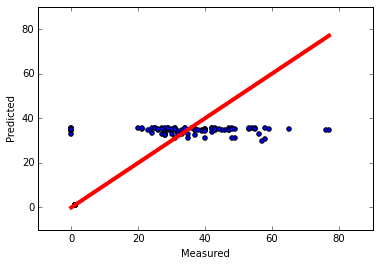

In [10]:
samples = map(lambda x: x.strip('\r\n'), open('./samples/call_samples.txt', 'r').readlines())
print samples

eg3sizes = map(lambda i: i.strip('\n').split(': ')[-1], open('./logs/call_100eg3.log').readlines())
print eg3sizes

from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lr = linear_model.LinearRegression()
X = eg3sizes
y = ages

X = np.array(map(lambda x: (int(x),1), X))
y = np.array(map(lambda x: (int(x),1), y))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
1797
Predicition: [8]


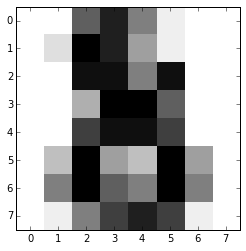

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import svm

digits = datasets.load_digits()

print digits.data
print digits.target
print digits.images[0]

clf = svm.SVC(gamma=0.01, C=100)

print len(digits.data)

x,y = digits.data[:-1], digits.target[:-1]
clf.fit(x,y)

print "Predicition:", clf.predict(digits.data[-1])

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

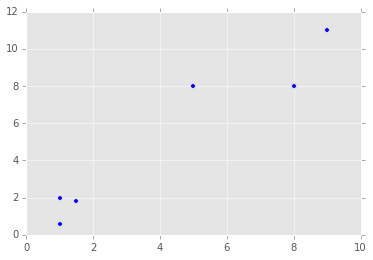

[1]
[ 0.1380943   0.24462418]


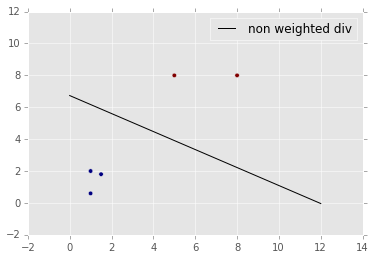

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib import style
%matplotlib inline
style.use('ggplot')

x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

plt.scatter(x, y)
plt.show()

# X has two feartures: x, y
X = np.array([[1,2], [5,8], [1.5,1.8], [8,8], [1, 0.6], [9, 11]])
y = [0,1,0,1,0,1]

clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(X, y)

print clf.predict([10.58, 10.76])

w = clf.coef_[0]
print w

a = -w[0] / w[1]

xx = np.linspace(0, 12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label = "non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()